<a href="https://colab.research.google.com/github/VidyaValsalan/Deploy-RLprediction/blob/master/Vanilla_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files

In [3]:
uploaded = files.upload()

Saving excel_model_15.csv to excel_model_15.csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "excel_model_15.csv" with length 5019 bytes


In [6]:
import io
df1 = pd.read_csv(io.StringIO(uploaded['excel_model_15.csv'].decode('utf-8')),names=['date','4599','4291','5054','2157','4234','1018','22420','18494','19505','10215','11478','13223','16309','370'])
df1.head(5)
a=input('Enter the Location ID')

Enter the Location ID4599


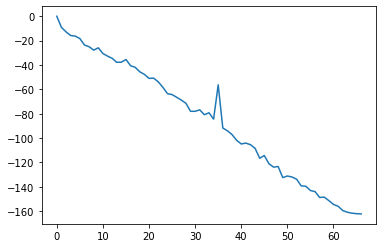

In [7]:
import matplotlib.pyplot as plt

df1=df1.reset_index()[a]
#plt.plot(df1)
df1.plot()

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model=Sequential()
model.add(LSTM(50,input_shape=(4,1)))
#model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [37]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4433 - val_loss: 0.0112
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 0.4195 - val_loss: 0.0098
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 0.3966 - val_loss: 0.0084
Epoch 4/100
1/1 [==============================] - 0s 33ms/step - loss: 0.3745 - val_loss: 0.0073
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 0.3533 - val_loss: 0.0062
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 0.3329 - val_loss: 0.0054
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 0.3132 - val_loss: 0.0046
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 0.2943 - val_loss: 0.0040
Epoch 9/100
1/1 [==============================] - 0s 40ms/step - loss: 0.2760 - val_loss: 0.0035
Epoch 10/100
1/1 [==============================] - 0s 38ms/step - loss: 0.2584 - val_loss: 0.0032
Epoch 11/100
1/1 [===

In [38]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [39]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [40]:
import math
from sklearn.metrics import mean_squared_error
mse=math.sqrt(mean_squared_error(y_train,train_predict))
print(mse)
accuracy_percent = 1 - np.sqrt(mse)
accuracy_percent

0.06684351694087973


0.7414588679902563

In [41]:
mse1=math.sqrt(mean_squared_error(ytest,test_predict))
accuracy_percent = 1 - np.sqrt(mse1)
accuracy_percent

0.5632496871943824

In [42]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

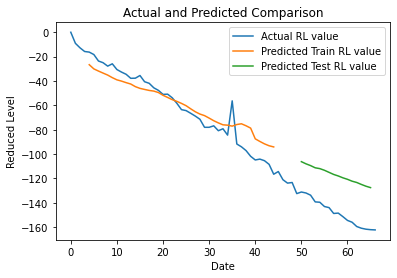

In [43]:
import matplotlib.pyplot as plt
look_back=4
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1),label='Actual RL value')
plt.plot(trainPredictPlot,label='Predicted Train RL value')
plt.plot(testPredictPlot,label='Predicted Test RL value')
plt.xlabel('Date')
plt.ylabel('Reduced Level')
plt.title('Actual and Predicted Comparison')
plt.legend()
plt.show()


In [ ]:
len(test_data)

21

In [ ]:
x_input=test_data[17:].reshape(1,-1)
x_input.shape

(1, 4)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
#prediction for next n days
from numpy import array

lst_output=[]
n_steps=4
i=0
while(i<60):
    
    if(len(temp_input)>4):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[-0.00566151]
5
1 day input [ 0.00369914  0.00123305  0.         -0.00566151]
1 day output [[-0.00862659]]
2 day input [ 0.00123305  0.         -0.00566151 -0.00862659]
2 day output [[-0.010905]]
3 day input [ 0.         -0.00566151 -0.00862659 -0.010905  ]
3 day output [[-0.01344527]]
4 day input [-0.00566151 -0.00862659 -0.010905   -0.01344527]
4 day output [[-0.01677062]]
5 day input [-0.00862659 -0.010905   -0.01344527 -0.01677062]
5 day output [[-0.01902895]]
6 day input [-0.010905   -0.01344527 -0.01677062 -0.01902895]
6 day output [[-0.02116626]]
7 day input [-0.01344527 -0.01677062 -0.01902895 -0.02116626]
7 day output [[-0.02342876]]
8 day input [-0.01677062 -0.01902895 -0.02116626 -0.02342876]
8 day output [[-0.02567805]]
9 day input [-0.01902895 -0.02116626 -0.02342876 -0.02567805]
9 day output [[-0.02752985]]
10 day input [-0.02116626 -0.02342876 -0.02567805 -0.02752985]
10 day output [[-0.02934409]]
11 day input [-0.02342876 -0.02567805 -0.02752985 -0.02934409]
11 day outp

In [ ]:
day_new=np.arange(1,5)
day_pred=np.arange(5,65)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

67

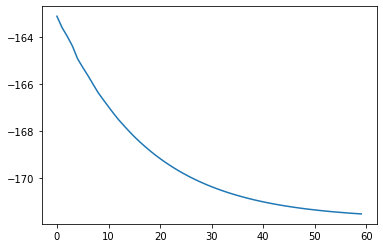

In [ ]:
df3=[]
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [ ]:
df3

[[5.7656881570816045],
 [4.7697627484798435],
 [3.4697542756795885],
 [3.090749606490135],
 [2.964544767141342],
 [3.5525851130485537],
 [3.88405641913414],
 [4.033627659082413],
 [4.119852596521378],
 [4.164571100473404],
 [4.188470697402954],
 [4.197288542985916],
 [4.201266795396805],
 [4.201955622434616],
 [4.202525961399078],
 [4.202435714006424],
 [4.202607613801956],
 [4.202536398172379],
 [4.202610683441162],
 [4.202568936347961],
 [4.2026027023792265],
 [4.202579987049103],
 [4.202595949172974],
 [4.202585512399674],
 [4.202593493461609],
 [4.202587968111038],
 [4.202591651678086],
 [4.20258858203888],
 [4.202590423822403],
 [4.202589195966721],
 [4.202589809894562],
 [4.202589809894562],
 [4.202589809894562],
 [4.202589809894562],
 [4.202589195966721],
 [4.202589809894562],
 [4.202589809894562],
 [4.202589809894562],
 [4.202589809894562],
 [4.202589195966721],
 [4.202589809894562],
 [4.202589809894562],
 [4.202589809894562],
 [4.202589809894562],
 [4.202589195966721],
 [4.202

In [ ]:
d=df3
d

[[-52.70612120628357],
 [-48.96175146102905],
 [-46.03156507015228],
 [-43.181641697883606],
 [-40.83662390708923],
 [-39.264320731163025],
 [-38.179378509521484],
 [-37.40026354789734],
 [-36.82362735271454],
 [-36.39623939990997],
 [-36.078537702560425],
 [-35.84072768688202],
 [-35.661192536354065],
 [-35.52499532699585],
 [-35.421446561813354],
 [-35.34258961677551],
 [-35.28239965438843],
 [-35.23639142513275],
 [-35.20118951797485],
 [-35.17423212528229],
 [-35.15358328819275],
 [-35.13774931430817],
 [-35.125603675842285],
 [-35.116286873817444],
 [-35.10914385318756],
 [-35.10366141796112],
 [-35.099451541900635],
 [-35.096222162246704],
 [-35.09374797344208],
 [-35.09184539318085],
 [-35.09037673473358],
 [-35.089258551597595],
 [-35.088399052619934],
 [-35.08773148059845],
 [-35.08722245693207],
 [-35.086838603019714],
 [-35.08654236793518],
 [-35.086312890052795],
 [-35.08613348007202],
 [-35.08599579334259],
 [-35.08589148521423],
 [-35.08581221103668],
 [-35.0857412815094]

In [ ]:
df3 = pd.DataFrame(df3)
data = pd.read_csv('try.csv')
data['Vidya'] = df3 # changed here
data.to_csv('try.csv', index=False, mode= 'w')